In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [3]:
from tensorflow.keras import layers, models

def create_vit_model(image_size=(28, 28, 1), patch_size=7, num_patches=16, num_classes=10):
    inputs = layers.Input(shape=image_size)

    # Flatten the image into patches
    patches = layers.Reshape((image_size[0] // patch_size, image_size[1] // patch_size, patch_size * patch_size))(inputs)
    patches = layers.Reshape((-1, patch_size * patch_size))(patches)  # Flatten each patch into a vector

    # Linear projection of patches (embedding)
    patch_embeddings = layers.Dense(256)(patches)

    # Transformer Encoder block
    transformer_layer = layers.MultiHeadAttention(num_heads=4, key_dim=256)(patch_embeddings, patch_embeddings)
    transformer_layer = layers.Add()([patch_embeddings, transformer_layer])

    # Global average pooling
    x = layers.GlobalAveragePooling1D()(transformer_layer)

    # Fully connected layers
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, x)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [4]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data
x_train = x_train[..., None].astype("float32") / 255.0
x_test = x_test[..., None].astype("float32") / 255.0

# Train CNN
cnn_model = create_cnn_model()
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Train ViT
vit_model = create_vit_model()
vit_history = vit_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8685 - loss: 0.4233 - val_accuracy: 0.9791 - val_loss: 0.0629
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9833 - loss: 0.0537 - val_accuracy: 0.9871 - val_loss: 0.0397
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9892 - loss: 0.0360 - val_accuracy: 0.9885 - val_loss: 0.0328
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9913 - loss: 0.0272 - val_accuracy: 0.9901 - val_loss: 0.0314
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9932 - loss: 0.0225 - val_accuracy: 0.9881 - val_loss: 0.0417
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9945 - loss: 0.0170 - val_accuracy: 0.9924 - val_loss: 0.0272
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9846 - val_loss: 0.0629
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9959 - loss: 0.0140 - val_accurac

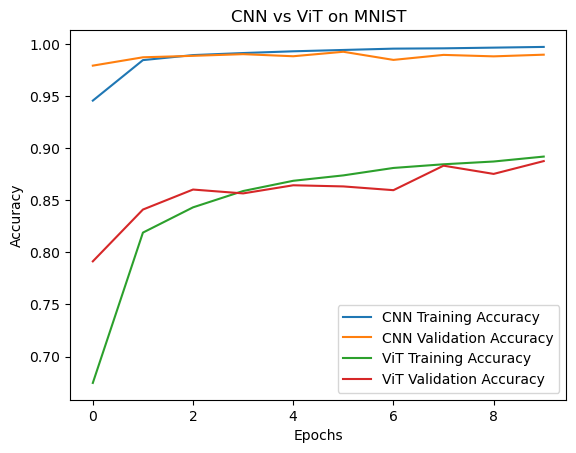

In [5]:
import matplotlib.pyplot as plt

# Plot CNN results
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')

# Plot ViT results
plt.plot(vit_history.history['accuracy'], label='ViT Training Accuracy')
plt.plot(vit_history.history['val_accuracy'], label='ViT Validation Accuracy')

plt.title('CNN vs ViT on MNIST')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
